In [2]:
import pandas as pd
from scipy import stats
import numpy as np
from dit.divergences import jensen_shannon_divergence
from scipy.spatial import distance
import scipy.spatial.distance as ssd
from scipy.cluster.hierarchy import dendrogram, linkage
import random

In [20]:
# Generate some sample data
random.seed(123)
day0 = np.abs(np.random.normal(50, 19, 1000))
day1 = day0 + 1
day2 = day0 + 2

day3 = day1 + 80
day4 = day1 + 100 # Day of event
day5 = day1 + 90

day6 = day1 + 1
day7 = day2 + 1
day8 = day1 + 1

samp_dat = pd.DataFrame({'day': np.repeat([1, 2, 3, 4, 5, 6, 7, 8, 9], 1000),
                        'distance': np.concatenate([day0, day1, day2, day3, day4, \
                                                   day5, day6, day7, day8])})
samp_dat['distance'] = np.log(1 + samp_dat['distance'])

In [21]:
# Get JS Distances
jds_dmat = pd.DataFrame()
for i in range(1, 10):
    for j in range(1, 10):
        x = samp_dat[samp_dat['day'] == i].distance
        y = samp_dat[samp_dat['day'] == j].distance
        jds = distance.jensenshannon(x, y)
        outdat = pd.DataFrame({'day_a': [i], 'day_b': [j], 'jds': [round(jds, 4)]})
        jds_dmat = jds_dmat.append(outdat, ignore_index=True)

In [22]:
# Calculate distance matrix
distMatrix = jds_dmat.pivot(index='day_a', columns='day_b', values='jds')
distArray = ssd.squareform(distMatrix)
distArray

array([0.0091, 0.0125, 0.041 , 0.0424, 0.0418, 0.0125, 0.0149, 0.0125,
       0.0039, 0.0353, 0.0368, 0.0361, 0.0039, 0.0065, 0.0039, 0.0322,
       0.0338, 0.0331, 0.    , 0.0027, 0.    , 0.0017, 0.0009, 0.0322,
       0.0299, 0.0322, 0.0008, 0.0338, 0.0315, 0.0338, 0.0331, 0.0308,
       0.0331, 0.0027, 0.    , 0.0027])

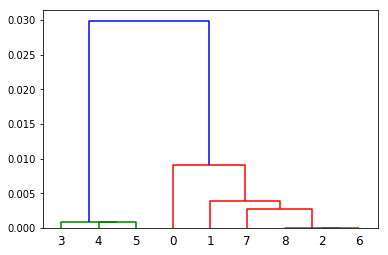

In [24]:
# Perform H-Clustering using distance matrix
# Note 3, 4, 5 days are clustered together as a day of event
Z = linkage(distArray, )
dn = dendrogram(Z)

In [ ]:
from pyclustering.cluster.kmedoids import kmedoids;
# K-Medoids Clustering
initial_medoids = [1, 2]
# create K-Medoids algorithm for processing distance matrix instead of points
kmedoids_instance = kmedoids(distArray, initial_medoids, data_type='distance_matrix')

# run cluster analysis and obtain results
kmedoids_instance.process()

#clusters = kmedoids_instance.get_clusters()
#medoids = kmedoids_instance.get_medoids()